<a href="https://colab.research.google.com/github/MatiasMarro/Labeled_Faces_in_the_Wild/blob/main/Marro_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Final**
## Redes neuronales y aprendizaje profundo  

---

En este notebook se implementarán dos tipos de redes neuronales para la tarea de **reconocimiento facial** sobre el conjunto de datos de imágenes de rostros **LFW (Labeled Faces in the Wild)**.

El objetivo es construir y comparar dos modelos de red:

* **Fully Connected Network** (red densa)  
* **Convolutional Neural Network (CNN)** (red convolucional)  

Para la división de los datos en conjuntos de entrenamiento y prueba se utilizará el método [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  
El porcentaje asignado al conjunto de prueba podrá elegirse libremente en el rango **entre 20% y 30%**.

En ambos modelos se deberá alcanzar una **precisión (accuracy)** de al menos:

* **90%** sobre el conjunto de **entrenamiento**
* **80%** sobre el conjunto de **prueba**.  

Además, se evaluará el **desempeño de los modelos** utilizando la [matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) sobre el conjunto de prueba.

---

> **Documentación extraída de scikit-learn y tensorflow**  
> [fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#gallery-examples)
> [tensorflow](https://www.tensorflow.org/?hl=es-419)




---


# **Modelo Red Densa**

---



## Librerias

In [ ]:
# Import de librerias generales
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Importe esta libreria que encontre en la web para visualizar mejor la matriz de confusion https://seaborn.pydata.org/
import numpy as np

# Dataset y utilidades de scikit-learm
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Keras/Tensorflow API
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## Dataset


In [ ]:
# Configuracion de reproducibilidad
np.random.seed(14)

# Cargamos objeto con el dataset, filtrando aquellas etiquetas que tienene 70 o mas imagenes. Color esta desactivado esto hace que las imagenes carguen en escala de grises
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False, download_if_missing=True)

In [ ]:
# Obtenemos informacion del conjunto de datos
image_count, image_height, image_width = lfw_people.images.shape
print(f"Imagenes: {image_count}")
print(f"Clases: {len(lfw_people.target_names)}")
print(f"Dimensiones de imagen: {image_height}x{image_width}")
print(f"Nombres de las clases: {lfw_people.target_names}")

Imagenes: 1288
Clases: 7
Dimensiones de imagen: 50x37
Nombres de las clases: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


###Visualizacion

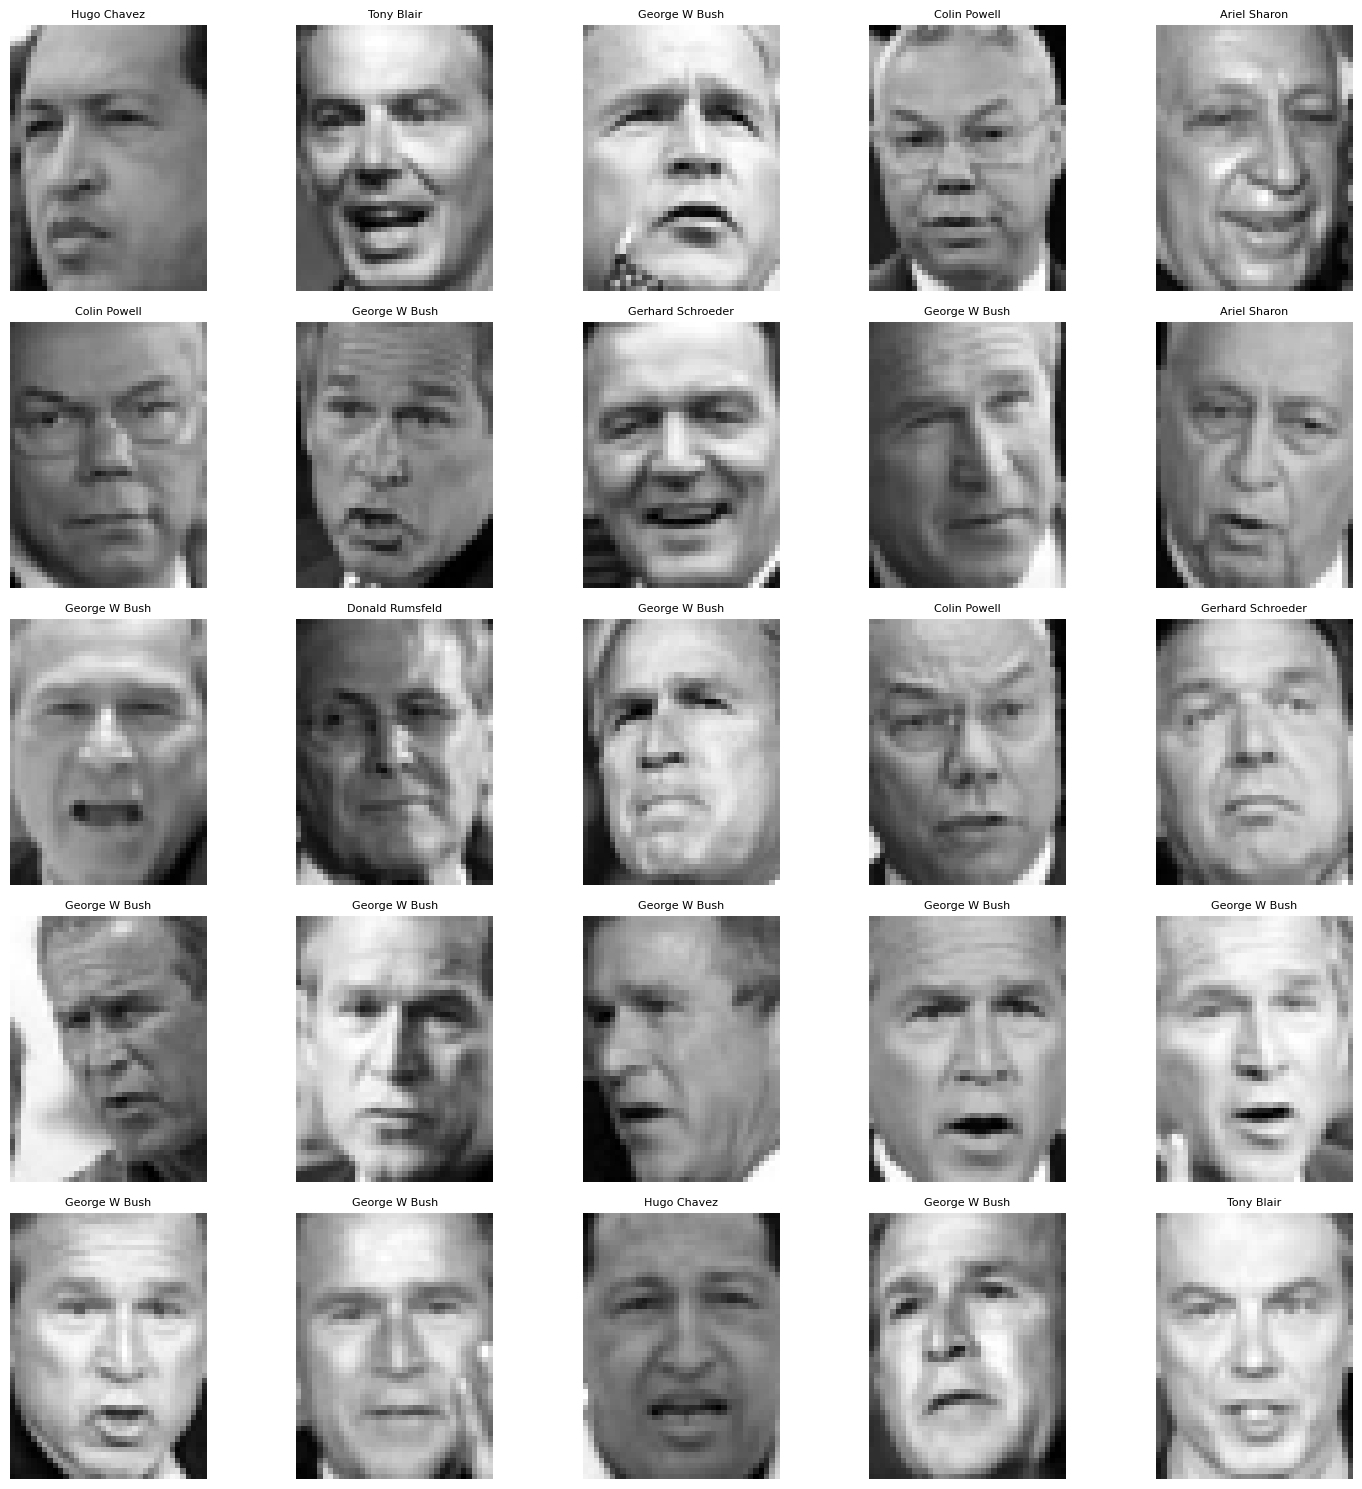

In [ ]:
def show_sample_faces(images, targets, target_names, n_rows=5, n_cols=5):
    n_total = n_rows * n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))

    for i, ax in enumerate(axes.ravel()):
        if i >= len(images):
            ax.axis("off")
            continue

        ax.imshow(images[i], cmap="gray")
        ax.set_title(target_names[targets[i]], fontsize=8)
        ax.axis("off")

    fig.tight_layout()
    plt.show()

# Muestra una cuadricula de las imagenes y su respectiva etiqueta
show_sample_faces(lfw_people.images, lfw_people.target, lfw_people.target_names)

##Preparacion de datos

In [ ]:
# Segun la documentacion, al usar el lfw_people.data ya nos devuelve las imagenes aplanadas
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
class_count = len(lfw_people.target_names)
# X = X.astype("float32") / 255 ya estan normalizados
y = to_categorical(y, class_count)
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8, # 80% para entrenamiento 20% para test
    stratify=y,
    random_state=42
)

print(f"Cantidad de datos de entrenamiento: {x_train.shape[0]}")
print(f"Cantidad de datos de prueba: {x_test.shape[0]}")

Cantidad de datos de entrenamiento: 1030
Cantidad de datos de prueba: 258


##Modelo red densa

In [ ]:
# Definicion del modelo
input_layer = Input(shape=(image_width * image_height,))
hidden_layer = Dense(256, activation='relu')(input_layer)
hidden_layer = Dropout(0.2)(hidden_layer)
output_layer = Dense(class_count, activation='softmax')(hidden_layer)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1850)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       473,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,655 (1.81 MB)

 Trainable params: 475,655 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento y graficos

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=150,
    batch_size=30, #30
)

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - acc: 0.3136 - loss: 2.3029 - mse: 0.1298 - val_acc: 0.4147 - val_loss: 1.6057 - val_mse: 0.1043
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4065 - loss: 1.6866 - mse: 0.1079 - val_acc: 0.4612 - val_loss: 1.5076 - val_mse: 0.0979
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4784 - loss: 1.5169 - mse: 0.0979 - val_acc: 0.4341 - val_loss: 1.5585 - val_mse: 0.1034
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4814 - loss: 1.4950 - mse: 0.0967 - val_acc: 0.5078 - val_loss: 1.4716 - val_mse: 0.0952
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5173 - loss: 1.4363 - mse: 0.0938 - val_acc: 0.4922 - val_loss: 1.3690 - val_mse: 0.0898
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5171 - loss: 1.3511 - mse: 0.0883 - val_acc: 0.5078 - val_loss: 1.3264 - val_mse: 0.0867
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5421 - loss: 1.2889 - mse: 0.0852 - val_acc: 

###Grafico de exactitud entrenamiento/validación

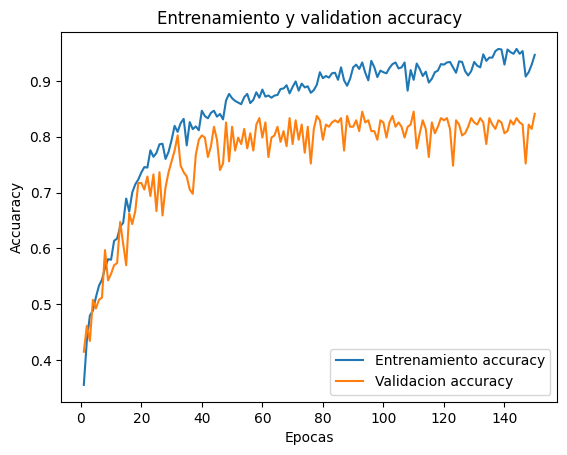

In [ ]:
def show_history(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Entrenamiento accuracy')
    plt.plot(epochs, val_acc, '-', label='Validacion accuracy')
    plt.title('Entrenamiento y validation accuracy')
    plt.xlabel('Epocas')
    plt.ylabel('Accuaracy')
    plt.legend(loc='lower right')
    plt.plot()

show_history(history)

###Matriz de confusión

Text(113.92222222222219, 0.5, 'Actual label')

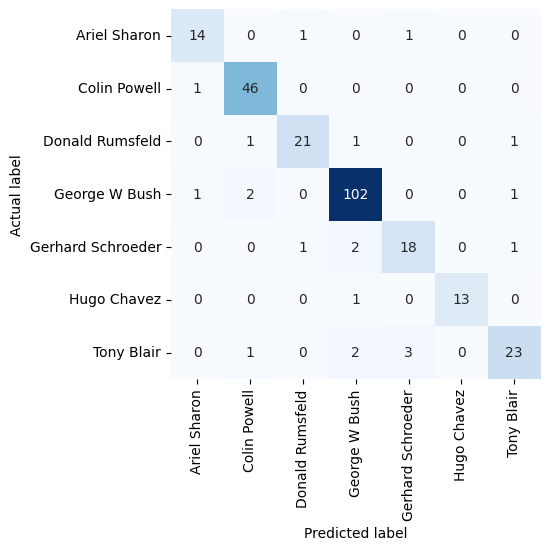

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test, verbose=False)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')



---


# **Modelo Red Convolucional (CNN)**


---





## Librerias

In [ ]:
# Keras/Tensorflow API librerias para cnn
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
from sklearn.metrics import confusion_matrix

## Dataset

In [ ]:
# Configuracion de reproducibilidad
np.random.seed(10)
batch_size=25
epochs=150

# Cargamos dataset
lfw_people = fetch_lfw_people(
    min_faces_per_person=70,
    resize=0.4,
    color=False,
    download_if_missing=True
)

## Preparación de datos



In [ ]:
X = lfw_people.images # Notar que las imagenes tienen forma (n_samples, h, w) falta el canal
y = lfw_people.target
n_classes = len(lfw_people.target_names)
print("Forma original de X:", X.shape)
print("Cantidad de clases:", n_classes)

# Hacemos el split para datos de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,# 80% train 20% test
    stratify=y,
    random_state=42
    )

# one-hot encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print("y_train shape (one-hot):", y_train.shape)
print("y_test shape (one-hot):", y_test.shape)

# Las imagenes eran (n_samples, h, w). Agregamos la dimension de canal: (n_samples, h, w, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]
print("x_train shape (para CNN):", x_train.shape)
print("x_test shape (para CNN):", x_test.shape)


Forma original de X: (1288, 50, 37)
Cantidad de clases: 7
y_train shape (one-hot): (1030, 7)
y_test shape (one-hot): (258, 7)
x_train shape (para CNN): (1030, 50, 37, 1)
x_test shape (para CNN): (258, 50, 37, 1)


## Generación de datos con Data Augmentation

In [ ]:
# Generador de datos para realizar data augmentation sobre las imagenes de entrenamiento usando ImageDataGenerator https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,# Desplazamiento horizontal
    height_shift_range=0.1,# Desplazamiento vertical
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',# Rellena con el valor del pxxel vecino mas cercano
    cval=0.,

    horizontal_flip=True,# espeja la imagen horizontalmente
    vertical_flip=False,# no veo sentido a dar vuelta boca abajo caras asi que lo dejamos desactivado
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0
)

# Generador de batches con data augmentation a partir de x_train, y_train
train_generator = datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size
)


##Modelo CNN

In [ ]:
# Defino una funcion que me devuelve el modelo
def build_cnn_model(input_shape, n_classes):
    # Capa de entrada
    input_layer_1 = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer_1)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.35)(x)

    x = Flatten()(x)

    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(n_classes, activation='softmax')(x)
    model = Model(input_layer_1, output_layer)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['acc', 'mse']
    )

    return model

## Entrenamiento y graficos

### Entrenamiento sin data augmentation

In [ ]:
# Modelo
model_no_aug = build_cnn_model(input_shape=x_train.shape[1:],n_classes=n_classes )
model_no_aug.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50, 37, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 50, 37, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       442,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,703 (1.76 MB)

 Trainable params: 461,703 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del modelo
history_no_aug = model_no_aug.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - acc: 0.3189 - loss: 1.8331 - mse: 0.1161 - val_acc: 0.4109 - val_loss: 1.7216 - val_mse: 0.1112
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4078 - loss: 1.7567 - mse: 0.1121 - val_acc: 0.4109 - val_loss: 1.6834 - val_mse: 0.1090
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4239 - loss: 1.6852 - mse: 0.1084 - val_acc: 0.4109 - val_loss: 1.6714 - val_mse: 0.1083
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3991 - loss: 1.6933 - mse: 0.1092 - val_acc: 0.4225 - val_loss: 1.5358 - val_mse: 0.0991
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4841 - loss: 1.5002 - mse: 0.0971 - val_acc: 0.5155 - val_loss: 1.3088 - val_mse: 0.0846
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4890 - loss: 1.3622 - mse: 0.0891 - val_acc: 0.5543 - val_loss: 1.1844 - val_mse: 0.0760
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5089 - loss: 1.2609 - mse: 0.0829 - val_acc

### Entrenamiento con data augmentation

In [ ]:
# Modelo
model_aug = build_cnn_model(input_shape=x_train.shape[1:],n_classes=n_classes)
model_aug.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50, 37, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 37, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       442,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,703 (1.76 MB)

 Trainable params: 461,703 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento sin data augmentation
history_aug = model_aug.fit(
    train_generator,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - acc: 0.3572 - loss: 1.8100 - mse: 0.1147 - val_acc: 0.4109 - val_loss: 1.7862 - val_mse: 0.1150
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.4272 - loss: 1.7305 - mse: 0.1112 - val_acc: 0.4109 - val_loss: 1.7162 - val_mse: 0.1112
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4438 - loss: 1.6619 - mse: 0.1079 - val_acc: 0.4109 - val_loss: 1.7187 - val_mse: 0.1111
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.4231 - loss: 1.6937 - mse: 0.1097 - val_acc: 0.4109 - val_loss: 1.6865 - val_mse: 0.1090
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.3934 - loss: 1.6877 - mse: 0.1089 - val_acc: 0.4109 - val_loss: 1.7015 - val_mse: 0.1099
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.4229 - loss: 1.6775 - mse: 0.1083 - val_acc: 0.4109 - val_loss: 1.6367 - val_mse: 0.1053
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.4127 - loss: 1.6634 - mse: 0.1076 - val_acc: 0.410

###Grafico de exactitud entrenamiento/validación

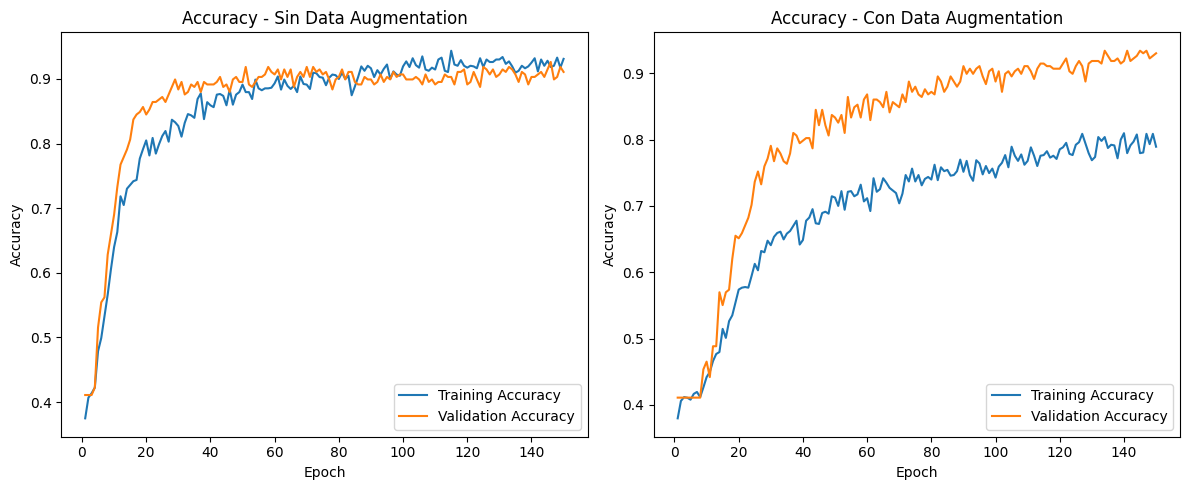

In [ ]:
def show_history_acc_compare(hist_no_aug, hist_aug):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    acc = hist_no_aug.history['acc']
    val_acc = hist_no_aug.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.title('Accuracy - Sin Data Augmentation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    acc2 = hist_aug.history['acc']
    val_acc2 = hist_aug.history['val_acc']
    epochs2 = range(1, len(acc2) + 1)

    plt.plot(epochs2, acc2, '-', label='Training Accuracy')
    plt.plot(epochs2, val_acc2, '-', label='Validation Accuracy')
    plt.title('Accuracy - Con Data Augmentation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()
show_history_acc_compare(history_no_aug, history_aug)

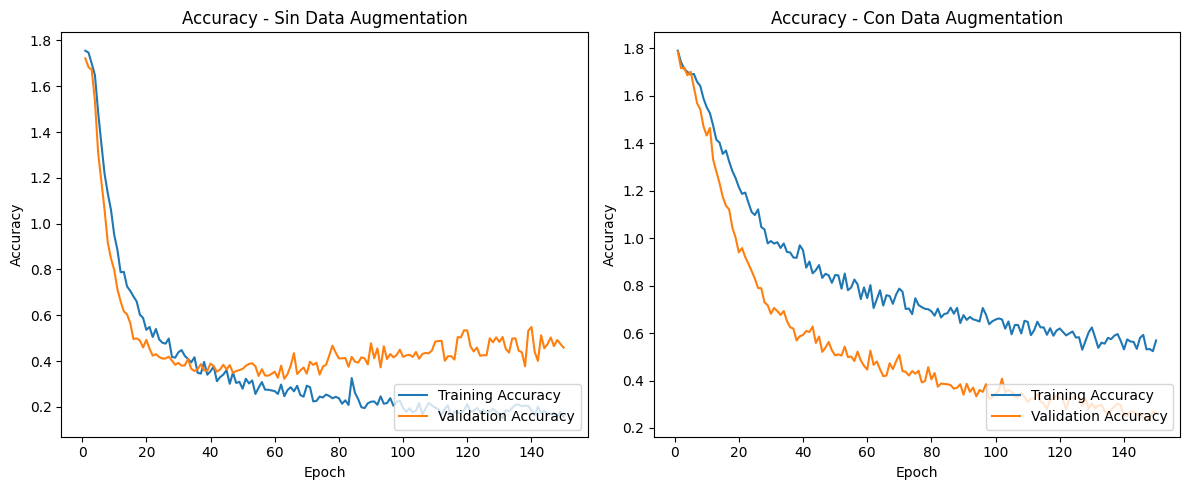

In [ ]:
def show_history_loss_compare(hist_no_aug, hist_aug):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    acc = hist_no_aug.history['loss']
    val_acc = hist_no_aug.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.title('Accuracy - Sin Data Augmentation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    acc2 = hist_aug.history['loss']
    val_acc2 = hist_aug.history['val_loss']
    epochs2 = range(1, len(acc2) + 1)

    plt.plot(epochs2, acc2, '-', label='Training Accuracy')
    plt.plot(epochs2, val_acc2, '-', label='Validation Accuracy')
    plt.title('Accuracy - Con Data Augmentation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()
show_history_loss_compare(history_no_aug, history_aug)

###Matriz de confusión

In [ ]:
def show_confusion_matrices(model_no_aug, model_aug, x_test, y_test, class_names):
    y_true = y_test.argmax(axis=1)

    # Predicciones del modelo sin data augmentation
    y_pred_no_aug = model_no_aug.predict(x_test, verbose=False)
    y_pred_no_aug = y_pred_no_aug.argmax(axis=1)

    # Predicciones del modelo con data augmentation
    y_pred_aug = model_aug.predict(x_test, verbose=False)
    y_pred_aug = y_pred_aug.argmax(axis=1)

    # Matrices de confusión
    mat_no_aug = confusion_matrix(y_true, y_pred_no_aug)
    mat_aug = confusion_matrix(y_true, y_pred_aug)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(
        mat_no_aug,
        square=True,
        annot=True,
        fmt='d',
        cbar=False,
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title('Matriz de confusión - sin Data Augmentation')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

    # ====== Matriz CON data augmentation ======
    plt.subplot(1, 2, 2)
    sns.heatmap(
        mat_aug,
        square=True,
        annot=True,
        fmt='d',
        cbar=False,
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title('Matriz de confusión - con Data Augmentation')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

    plt.tight_layout()
    plt.show()

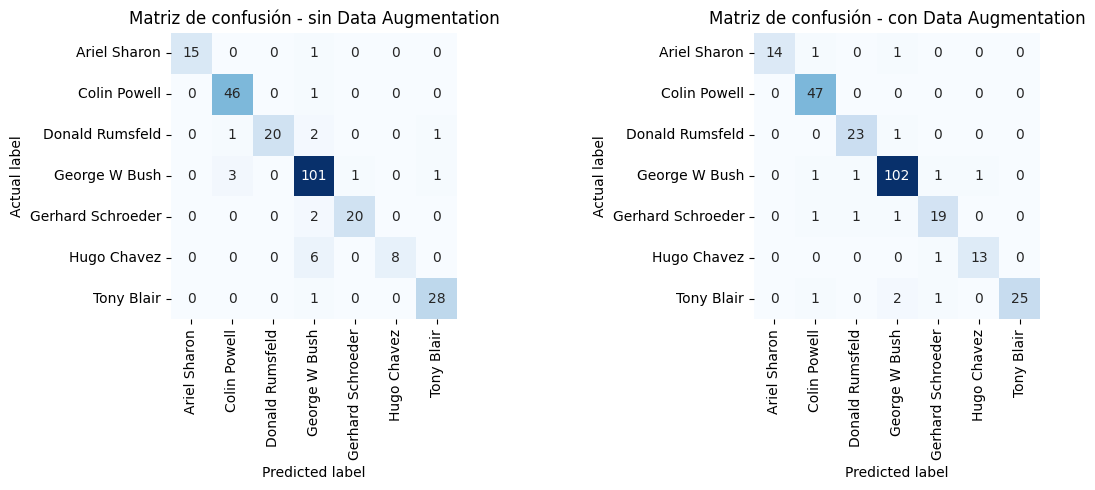

In [ ]:
show_confusion_matrices(
    model_no_aug=model_no_aug,
    model_aug=model_aug,
    x_test=x_test,
    y_test=y_test,
    class_names=lfw_people.target_names
)




---


# **Conclusiones**

---




En primer lugar, observando las gráficas de *accuracy* de ambas redes (red densa y red convolucional), se puede llegar a la conclusión de que las redes convolucionales son más adecuadas para el reconocimiento de imágenes. Esto se debe a que una red densa aplana la imagen y trata cada píxel como una entrada independiente, perdiendo la información, mientras que una red convolucional trabaja directamente sobre la estructura 2D de la imagen esto hace que aprendan patrones como bordes, texturas y formas. En los graficos esto se traduce en *accuracy* de validación más alto y un comportamiento más estable en la red convolucional en comparación con la red densa.

En cuanto a las matrices de confusion vemos que en ambos modelos logramos marcar una diagonal precisa para las mayoria de las etiquetas, es decir la mayoria de las predicciones caen sobre la etiqueta verdadera. Tambien se puede apreciar como el modelo tiende a confundir varias clases con la clase "George W Bush" lo cual se debe a un desbalance en el dataset. Las etiquetas (rostros) no cuentan todas con la misma cantidad de imágenes. Esta desproporción hace que el modelo tienda a favorecer las clases mayoritarias, de este modo aunque la *accuracy* global sea alta, el desempeño sobre las clases con menos ejemplos suele ser peor.

Esta situación puede apreciarse también al comparar las curvas de *accuracy* de los distintos modelos. En particular, en el modelo con data augmentation se observa un comportamiento llamativo: la validation *accuracy* resulta ser mayor que la training *accuracy*. Esto se debe a que las imágenes de entrenamiento son más complejas, ya que han sido modificadas mediante transformaciones geométricas, lo que dificulta el aprendizaje sobre el conjunto de entrenamiento en comparación con el conjunto de validación.

Para resolver este problema, una estrategia adecuada es balancear el conjunto de datos, limitando la cantidad de imágenes por clase a un número máximo común para todas, de manera que cada clase tenga una representación más equitativa durante el entrenamiento.

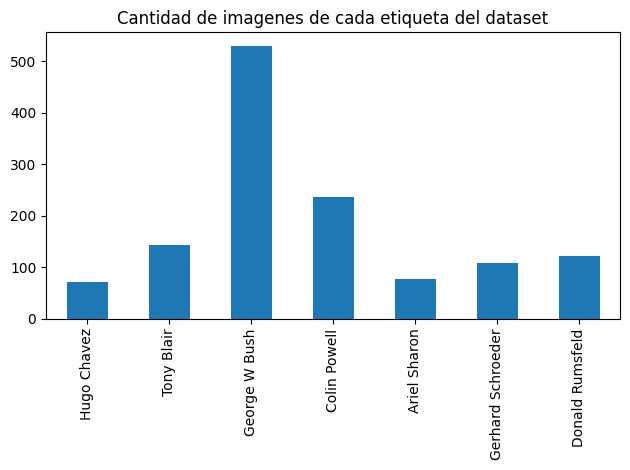

In [ ]:
from collections import Counter
counts = Counter(lfw_people.target)
names = {}
for key in counts.keys():
    names[lfw_people.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')

ax = df.plot(kind='bar', legend=False)
ax.set_title("Cantidad de imagenes de cada etiqueta del dataset")
ax.set_ylabel("")

plt.tight_layout()
plt.show()

###Modelo CNN con dataset balanceado

Forma original X: (1288, 1850) Forma original y: (1288,)
Forma balanceada X: (490, 1850) Forma balanceada y: (490,)


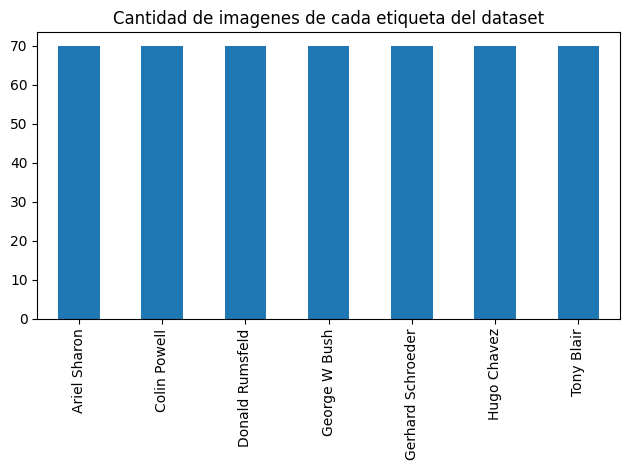

In [ ]:
from collections import Counter

X = lfw_people.data       # imágenes (n_samples, h*w)
y = lfw_people.target     # etiquetas (n_samples,)

# Cantidad maxima de ejemplos
max_por_clase = 70
indices_seleccionados = []

for clase in np.unique(y):
    indices_clase = np.where(y == clase)[0]

    indices_clase_recortados = indices_clase[:max_por_clase]

    indices_seleccionados.extend(indices_clase_recortados)

indices_seleccionados = np.array(indices_seleccionados)

# Creamos el nuevo dataset balanceado
X_balanced = X[indices_seleccionados]
y_balanced = y[indices_seleccionados]

print("Forma original X:", X.shape,"Forma original y:", y.shape)
print("Forma balanceada X:", X_balanced.shape,"Forma balanceada y:", y_balanced.shape)

counts = Counter(y_balanced)
names = {}
for key in counts.keys():
    names[lfw_people.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')

ax = df.plot(kind='bar', legend=False)
ax.set_title("Cantidad de imagenes de cada etiqueta del dataset")
ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# Modelo
model = build_cnn_model(input_shape=x_train.shape[1:],n_classes=n_classes )
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50, 37, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 37, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6912)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       442,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,703 (1.76 MB)

 Trainable params: 461,703 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - acc: 0.3205 - loss: 1.8000 - mse: 0.1153 - val_acc: 0.4109 - val_loss: 1.7727 - val_mse: 0.1143
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3784 - loss: 1.7761 - mse: 0.1138 - val_acc: 0.4109 - val_loss: 1.7080 - val_mse: 0.1106
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4156 - loss: 1.6938 - mse: 0.1092 - val_acc: 0.4109 - val_loss: 1.6481 - val_mse: 0.1068
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4107 - loss: 1.6888 - mse: 0.1090 - val_acc: 0.4380 - val_loss: 1.5543 - val_mse: 0.1009
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4431 - loss: 1.4906 - mse: 0.0967 - val_acc: 0.5465 - val_loss: 1.3040 - val_mse: 0.0851
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4802 - loss: 1.3861 - mse: 0.0919 - val_acc: 0.5814 - val_loss: 1.1887 - val_mse: 0.0780
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5357 - loss: 1.2465 - mse: 0.0837 - val_acc:

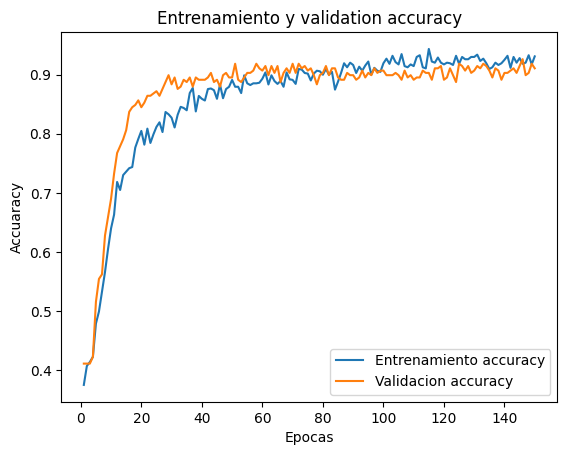

In [ ]:
def show_history(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Entrenamiento accuracy')
    plt.plot(epochs, val_acc, '-', label='Validacion accuracy')
    plt.title('Entrenamiento y validation accuracy')
    plt.xlabel('Epocas')
    plt.ylabel('Accuaracy')
    plt.legend(loc='lower right')
    plt.plot()

show_history(history_no_aug)

Text(113.92222222222219, 0.5, 'Actual label')

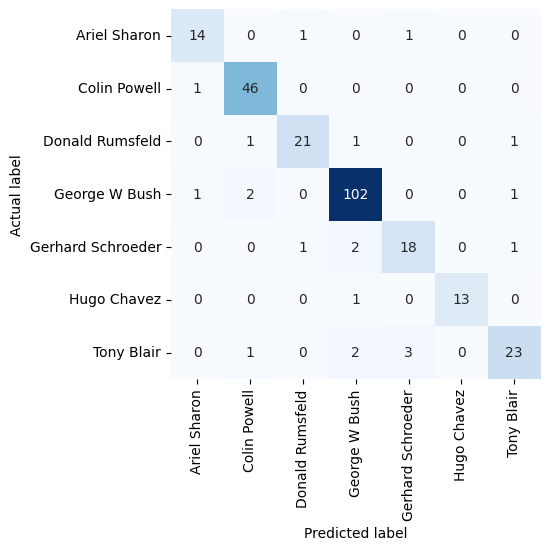

In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test, verbose=False)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')